In [ ]:
#Importing necessary libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files

In [ ]:
load_file = files.upload()
data = pd.read_excel('Oil_Prediction_Price.xlsx')

Saving Oil_Prediction_Price.xlsx to Oil_Prediction_Price.xlsx


In [ ]:
# from pandas.core.roperator import rpow
New_data_list = []
for index, row in data.iterrows():
  if row['Month'] == 'January':
    New_data_list.append([row['Geography'],str(row['Year']) +'-' +'01-01', row['Price']])
  elif row['Month'] == 'February':
    New_data_list.append([row['Geography'],str(row['Year']) +'-' +'02-01', row['Price']])
  elif row['Month'] == 'March':
    New_data_list.append([row['Geography'],str(row['Year']) +'-' +'03-01', row['Price']])
  elif row['Month'] == 'April':
    New_data_list.append([row['Geography'],str(row['Year']) +'-' +'04-01', row['Price']])
  elif row['Month'] == 'May':
    New_data_list.append([row['Geography'],str(row['Year']) +'-' +'05-01', row['Price']])
  elif row['Month'] == 'June':
    New_data_list.append([row['Geography'],str(row['Year']) +'-' +'06-01', row['Price']])
  elif row['Month'] == 'July':
    New_data_list.append([row['Geography'],str(row['Year']) +'-' +'07-01', row['Price']])
  elif row['Month'] == 'August':
    New_data_list.append([row['Geography'],str(row['Year']) +'-' +'08-01', row['Price']])
  elif row['Month'] == 'September':
    New_data_list.append([row['Geography'],str(row['Year']) +'-' +'09-01', row['Price']])
  elif row['Month'] == 'October':
    New_data_list.append([row['Geography'],str(row['Year']) +'-' +'10-01', row['Price']])
  elif row['Month'] == 'November':
    New_data_list.append([row['Geography'],str(row['Year']) +'-' +'11-01', row['Price']])      
  elif row['Month'] == 'December':
    New_data_list.append([row['Geography'],str(row['Year']) +'-' +'12-01', row['Price']])

In [ ]:
df = pd.DataFrame(New_data_list, columns=['Geography','Date','Price'])
df

,Geography,Date,Price
0,"St. John's, Newfoundland and Labrador",1990-01-01,61.1
1,"St. John's, Newfoundland and Labrador",1990-02-01,61.5
2,"St. John's, Newfoundland and Labrador",1990-03-01,61.7
3,"St. John's, Newfoundland and Labrador",1990-04-01,62.7
4,"St. John's, Newfoundland and Labrador",1990-05-01,63.3
...,...,...,...
4329,"Victoria, British Columbia",2022-06-01,249.1
4330,"Victoria, British Columbia",2022-07-01,226.2
4331,"Victoria, British Columbia",2022-08-01,216.9
4332,"Victoria, British Columbia",2022-09-01,229.8


In [ ]:
oil_toronto = df[(df.Geography == 'Toronto, Ontario')]
oil_toronto = oil_toronto[['Date','Price']]
oil_toronto['Date'] = pd.to_datetime(oil_toronto['Date'])
oil_toronto.set_index('Date',inplace=True)
oil_toronto.tail()

,Price
Date,
2022-06-01,231.6
2022-07-01,206.0
2022-08-01,191.2
2022-09-01,174.5
2022-10-01,190.1


In [ ]:
oil_toronto.describe()

,Price
count,394.000000
mean,101.600761
std,36.529399
min,52.500000
25%,65.025000
50%,98.350000
75%,133.125000
max,231.600000


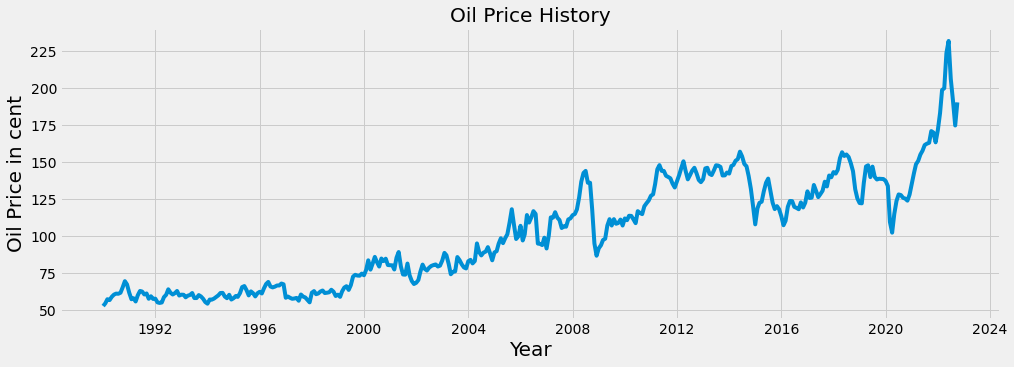

In [ ]:
#Plotting the the graph
plt.figure(figsize=(15,5))
plt.title('Oil Price History')
plt.plot(oil_toronto['Price'])
plt.xlabel('Year', fontsize=20)
plt.ylabel('Oil Price in cent', fontsize=20)
plt.show()

In [ ]:
data = oil_toronto.filter(['Price'])
print(type(data))
dataset = data.values
print(type(dataset))
training_data_len = math.ceil(len(dataset)*.8)
training_data_len
dataset

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


array([[ 52.5],
       [ 54.4],
       [ 57.1],
       [ 56.5],
       [ 58.7],
       [ 60.2],
       [ 60.9],
       [ 60.8],
       [ 61.5],
       [ 65.1],
       [ 69.3],
       [ 67.1],
       [ 61.5],
       [ 57.1],
       [ 57.8],
       [ 55.6],
       [ 59.8],
       [ 62.7],
       [ 62.3],
       [ 60.3],
       [ 61. ],
       [ 57.4],
       [ 59.1],
       [ 57.3],
       [ 57.5],
       [ 55. ],
       [ 54.6],
       [ 54.9],
       [ 58.5],
       [ 60.1],
       [ 63.8],
       [ 61.5],
       [ 60.3],
       [ 61.2],
       [ 62.7],
       [ 59.6],
       [ 60.2],
       [ 60.1],
       [ 58.4],
       [ 59.5],
       [ 60. ],
       [ 61.3],
       [ 57.9],
       [ 57.9],
       [ 59.9],
       [ 59. ],
       [ 57.4],
       [ 55.2],
       [ 54.1],
       [ 56.9],
       [ 56.8],
       [ 57.5],
       [ 58.6],
       [ 59.7],
       [ 61.3],
       [ 61.4],
       [ 58.9],
       [ 57.8],
       [ 60.1],
       [ 56.9],
       [ 57.8],
       [ 59.3],
       [

In [ ]:
dataset.shape

(394, 1)

In [ ]:
#sale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.0106086 ],
       [0.02568398],
       [0.02233389],
       [0.03461753],
       [0.04299274],
       [0.04690117],
       [0.04634283],
       [0.05025126],
       [0.07035176],
       [0.09380235],
       [0.0815187 ],
       [0.05025126],
       [0.02568398],
       [0.02959241],
       [0.01730877],
       [0.04075935],
       [0.05695142],
       [0.05471803],
       [0.04355109],
       [0.04745952],
       [0.02735902],
       [0.03685092],
       [0.02680067],
       [0.02791736],
       [0.01395868],
       [0.01172529],
       [0.01340034],
       [0.03350084],
       [0.04243439],
       [0.06309324],
       [0.05025126],
       [0.04355109],
       [0.04857621],
       [0.05695142],
       [0.03964266],
       [0.04299274],
       [0.04243439],
       [0.03294249],
       [0.03908431],
       [0.04187605],
       [0.04913456],
       [0.03015075],
       [0.03015075],
       [0.0413177 ],
       [0.03629257],
       [0.02735902],
       [0.015

In [ ]:
scaled_data[60]

array([0.02959241])

In [ ]:
#create the trainig dataset
#create he scaled training dataset
train_data = scaled_data[0:training_data_len,:]

#spliting the data in x-train and y_train datset
x_train = []
y_train = []

for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)


[array([0.        , 0.0106086 , 0.02568398, 0.02233389, 0.03461753,
       0.04299274, 0.04690117, 0.04634283, 0.05025126, 0.07035176,
       0.09380235, 0.0815187 , 0.05025126, 0.02568398, 0.02959241,
       0.01730877, 0.04075935, 0.05695142, 0.05471803, 0.04355109,
       0.04745952, 0.02735902, 0.03685092, 0.02680067, 0.02791736,
       0.01395868, 0.01172529, 0.01340034, 0.03350084, 0.04243439,
       0.06309324, 0.05025126, 0.04355109, 0.04857621, 0.05695142,
       0.03964266, 0.04299274, 0.04243439, 0.03294249, 0.03908431,
       0.04187605, 0.04913456, 0.03015075, 0.03015075, 0.0413177 ,
       0.03629257, 0.02735902, 0.01507538, 0.00893356, 0.02456728,
       0.02400893, 0.02791736, 0.03405918, 0.04020101, 0.04913456,
       0.04969291, 0.03573423, 0.02959241, 0.04243439, 0.02456728])]
[0.029592406476828537]
[array([0.        , 0.0106086 , 0.02568398, 0.02233389, 0.03461753,
       0.04299274, 0.04690117, 0.04634283, 0.05025126, 0.07035176,
       0.09380235, 0.0815187 , 0.05

In [ ]:
#converting x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(256, 60, 1)

In [ ]:
#build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=3,epochs=10)

Epoch 1/10
86/86 [==============================] - 8s 45ms/step - loss: 0.0046
Epoch 2/10
86/86 [==============================] - 4s 46ms/step - loss: 0.0030
Epoch 3/10
86/86 [==============================] - 4s 46ms/step - loss: 0.0029
Epoch 4/10
86/86 [==============================] - 4s 47ms/step - loss: 0.0031
Epoch 5/10
86/86 [==============================] - 4s 46ms/step - loss: 0.0030
Epoch 6/10
86/86 [==============================] - 4s 46ms/step - loss: 0.0022
Epoch 7/10
86/86 [==============================] - 4s 46ms/step - loss: 0.0021
Epoch 8/10
86/86 [==============================] - 4s 45ms/step - loss: 0.0019
Epoch 9/10
86/86 [==============================] - 4s 47ms/step - loss: 0.0017
Epoch 10/10
86/86 [==============================] - 4s 46ms/step - loss: 0.0016


In [ ]:
training_data_len

316

In [ ]:
#creatinf testing dataset
test_data = scaled_data[training_data_len - 60: , :]
print(test_data)
#creating x_test and y_tets datasets
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i -60:i, 0])
# x_test
# print(len(x_test))
# print(len(y_test))
# x_test

[[0.53154662]
 [0.50977108]
 [0.50977108]
 [0.49134562]
 [0.48687884]
 [0.48185371]
 [0.46119486]
 [0.44723618]
 [0.47012842]
 [0.49413735]
 [0.52037968]
 [0.54606365]
 [0.50977108]
 [0.47794528]
 [0.49357901]
 [0.51088777]
 [0.52149637]
 [0.50083752]
 [0.47571189]
 [0.46733668]
 [0.47850363]
 [0.51926298]
 [0.52149637]
 [0.49860413]
 [0.49413735]
 [0.51144612]
 [0.53098827]
 [0.52987158]
 [0.52484645]
 [0.49246231]
 [0.49302066]
 [0.50362926]
 [0.49972083]
 [0.52819654]
 [0.53210497]
 [0.54829704]
 [0.55388051]
 [0.58235623]
 [0.56448911]
 [0.5360134 ]
 [0.52707984]
 [0.49022892]
 [0.44165271]
 [0.37800112]
 [0.30820771]
 [0.36850921]
 [0.38916806]
 [0.39363484]
 [0.43271915]
 [0.46510329]
 [0.48073702]
 [0.43662758]
 [0.39028476]
 [0.36571748]
 [0.37688442]
 [0.36515913]
 [0.33891681]
 [0.30485762]
 [0.32160804]
 [0.37409269]
 [0.39642658]
 [0.39586823]
 [0.37409269]
 [0.37018425]
 [0.36515913]
 [0.3908431 ]
 [0.3718593 ]
 [0.38972641]
 [0.43271915]
 [0.40759352]
 [0.40871022]
 [0.45

In [ ]:
#converting data to numpy array
x_test = np.array(x_test)
x_test.shape

(78, 60)

In [ ]:
#reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(78, 60, 1)

In [ ]:
#get predicted price values
predictions = model.predict(x_test)
last_track = predictions
# print(predictions)
predictions = scaler.inverse_transform(predictions)

3/3 [==============================] - 1s 15ms/step


In [ ]:
#RMSE score
rmse = np.sqrt( np.mean( predictions - y_test)**2 )
rmse

3.767152287409856

<ipython-input-26-606f4df4dcad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


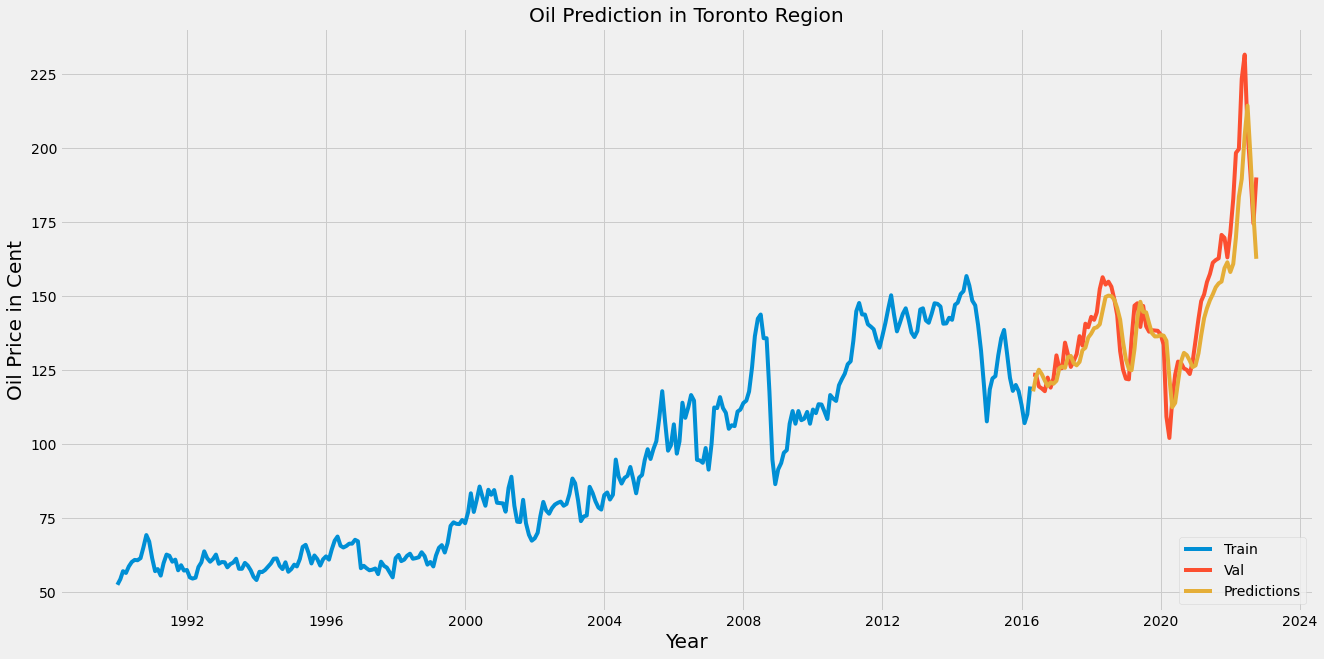

In [ ]:
#plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualization
plt.figure(figsize=(20,10))
plt.title('Oil Prediction in Toronto Region')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Oil Price in Cent', fontsize=20)
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Train', 'Val','Predictions'], loc='lower right')
plt.show()

In [ ]:
valid[['Price', 'Predictions']].tail(50)

,Price,Predictions
Date,,
2018-09-01,148.9,148.817276
2018-10-01,143.6,145.970901
2018-11-01,131.4,142.068878
2018-12-01,125.2,134.597275
2019-01-01,122.1,128.551102
2019-02-01,121.9,125.381264
2019-03-01,135.6,124.974747
2019-04-01,146.8,132.158234
2019-05-01,147.6,142.593216


In [ ]:
# cc = predictions[-60:]
# # cc

# scaler_val = scaler.fit_transform(cc)
# # scaler_val

# next_test = []
# next_test.append(scaler_val[:, 0])

# next_test = np.array(next_test)
# # next_test

# #reshape data
# next_test = np.reshape(next_test, (next_test.shape[0], next_test.shape[1], 1))
# next_test.shape

# #get predicted price values
# next_predictions = model.predict(next_test)
# next_predictions

# next_predictions = scaler.inverse_transform(next_predictions)
# print(next_predictions)

# vv = np.concatenate((cc, next_predictions))
# len(vv)

In [ ]:
future_prediction = predictions
future_vals = []
date_vals = []
price_with_date_list = []

def get_next_value(input_val):
  scaler_val = scaler.fit_transform(input_val)
  next_test = []
  next_test.append(scaler_val[:, 0])

  next_test = np.array(next_test)

  #reshape data
  next_test = np.reshape(next_test, (next_test.shape[0], next_test.shape[1], 1))
  next_test.shape

  #get predicted price values
  next_predictions = model.predict(next_test)

  next_predictions = scaler.inverse_transform(next_predictions)
  return next_predictions

year = 2022
month = 11
for i in range(0,50):
  predicted_val = get_next_value(future_prediction[-60:])

  future_vals.append(predicted_val[0][0])
  future_prediction = np.concatenate((future_prediction, predicted_val))
  d = str(year)+'-'+str(month)+'-01'
  date_vals.append(d)
  price_with_date_list.append([d,predicted_val[0][0]])
  if month == 12:
    year = year + 1
    month = 1
  else:
    month = month + 1
    
    


1/1 [==============================] - 0s 23ms/step


In [ ]:
print(future_vals)

[158.51692, 153.91571, 153.15259, 154.62993, 157.36856, 160.62874, 163.8325, 166.5372, 168.43991, 169.3935, 169.41353, 168.66034, 167.39252, 165.90237, 164.453, 163.2346, 162.34872, 161.81555, 161.59503, 161.61124, 161.77423, 161.99696, 162.20667, 162.35141, 162.40239, 162.35251, 162.21228, 162.00401, 161.75552, 161.4945, 161.24419, 161.1034, 161.32463, 161.61578, 161.82271, 162.0429, 162.23836, 162.3942, 162.52972, 162.77382, 163.09947, 163.4354, 163.73053, 164.00603, 164.25757, 164.48105, 164.69814, 164.90414, 165.10286, 165.29803]


In [ ]:
print(date_vals)

['2022-11-01', '2022-12-01', '2023-1-01', '2023-2-01', '2023-3-01', '2023-4-01', '2023-5-01', '2023-6-01', '2023-7-01', '2023-8-01', '2023-9-01', '2023-10-01', '2023-11-01', '2023-12-01', '2024-1-01', '2024-2-01', '2024-3-01', '2024-4-01', '2024-5-01', '2024-6-01', '2024-7-01', '2024-8-01', '2024-9-01', '2024-10-01', '2024-11-01', '2024-12-01', '2025-1-01', '2025-2-01', '2025-3-01', '2025-4-01', '2025-5-01', '2025-6-01', '2025-7-01', '2025-8-01', '2025-9-01', '2025-10-01', '2025-11-01', '2025-12-01', '2026-1-01', '2026-2-01', '2026-3-01', '2026-4-01', '2026-5-01', '2026-6-01', '2026-7-01', '2026-8-01', '2026-9-01', '2026-10-01', '2026-11-01', '2026-12-01']


In [ ]:
predicted_data = pd.DataFrame(price_with_date_list, columns=['Date','Predicted_Price'])
predicted_data['Date'] = pd.to_datetime(predicted_data['Date'])
predicted_data.set_index('Date',inplace=True)
predicted_data.head()

,Predicted_Price
Date,
2022-11-01,158.516922
2022-12-01,153.915710
2023-01-01,153.152588
2023-02-01,154.629929
2023-03-01,157.368561


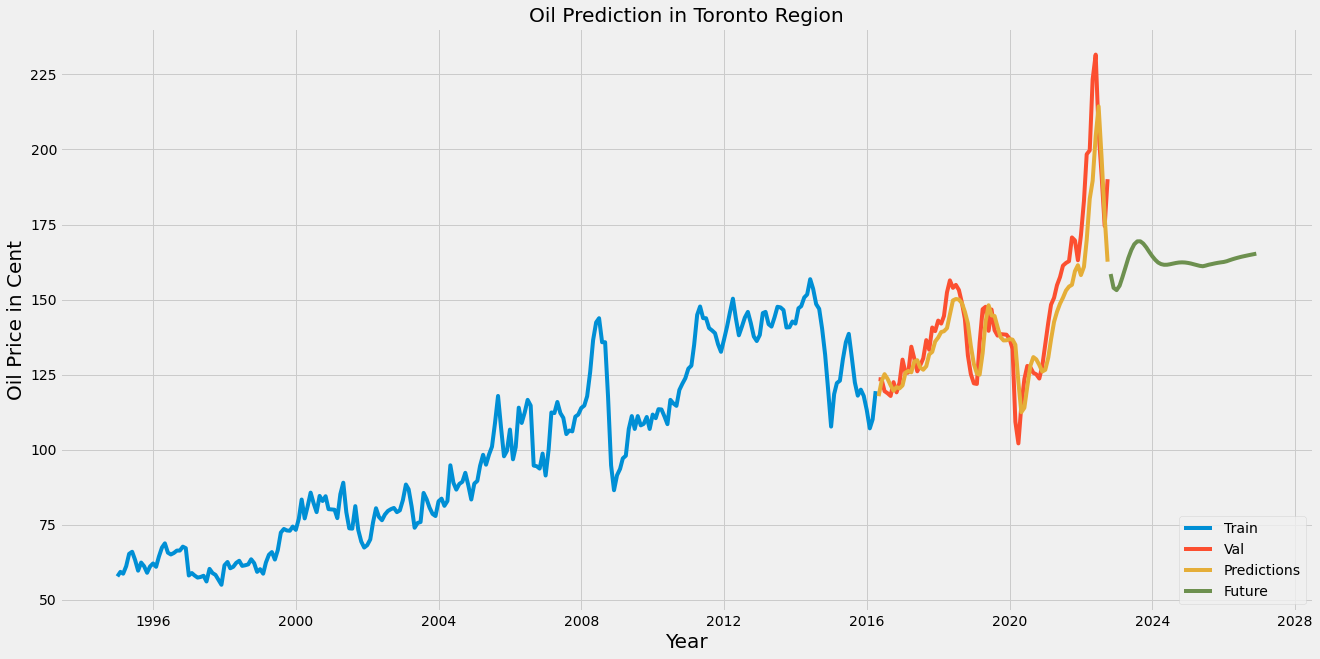

In [ ]:
#visualization
plt.figure(figsize=(20,10))
plt.title('Oil Prediction in Toronto Region')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Oil Price in Cent', fontsize=20)
plt.plot(train['Price'][60:])
plt.plot(valid[['Price', 'Predictions']])
plt.plot(predicted_data['Predicted_Price'])
plt.legend(['Train', 'Val','Predictions','Future'], loc='lower right')
plt.show()